# ECON 421
Shruti Rao 
20455421 
5 March, 2018

## Assignment 1 - Modeling Housing Sale Price

The goal of this assignment is to build a model to predict selling price of house. Various packages are imported to perform analysis and the dataset is imported.

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
from sklearn import datasets, linear_model

% matplotlib inline

In [152]:
df = pd.read_csv("./dataset1.csv")

Once the dataset is loaded in, it must be examined to see what explanatory variables are present in the dataset as these variables will be used later for predicting housing sale prices. 

In [153]:
df.head()

,price,sqft,Bedrooms,Baths,Age,Owner,Pool,Traditional,Fireplace,Waterfront
0,66500,741,1,1,18,1,1,1,1,0
1,66000,741,1,1,18,0,1,1,0,0
2,68500,790,1,1,18,1,0,1,1,0
3,102000,2783,2,2,18,1,0,1,1,0
4,54000,1165,2,1,35,0,0,1,0,0


From the table above, the dataset contains `sqft`, `Bedrooms`, `Baths`, `Age`, `Owner`, `Pool`, `Traditional`, `Fireplace` and `Waterfront`. Without any statistical analysis, the effects of the variables on price are intuitively discussed:
    * sqft - The square feet or area of the house would determine its price so usually a house with a larger area would be more expensive.
    * Bedrooms - The number of bedrooms too dictate the sale price of the house. Number of bedrooms are also related to the area as a house with a 5 bedrooms would usually have a larger area than a house with just 2 bedrooms. 
    * Baths - Similar to the idea of having number of bedrooms, the greater the number of baths, the more the price of the house.
    * Age - This factor is area specific and it's relationship can't be determined without knowing more about the dataset. In some cities like Paris, older houses are more valuable possibly due to exclusive architecture of the house. In other areas, newer houses are more expensive than older houses. So this variable's effects canot be judged till further information is obtained.
    * Owner - having a previous owner of the house should have no effect on the selling price.
    * Pool - Having a pool is usually a luxury and might increase the price of the house.
    * Traditional - Again, this variable may or may not have a positive effect on the price of the house. The argument for this is similar to the one for Age.
    * Fireplace - Fireplace might not affect the selling price of the house as it is usually added in modern homes for asthetic reasons. However, if this dataset is talking about housing prices in a remote cold area then the presence of a fireplace might increase the house price.
    * Waterfront - Waterfront might increase the value of the house as it is considered to add to the overall appeal of the house.

In [154]:
df.describe()

,price,sqft,Bedrooms,Baths,Age,Owner,Pool,Traditional,Fireplace,Waterfront
count,1.080000e+03,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,1.548632e+05,2325.937963,3.179630,1.973148,19.574074,0.488889,0.079630,0.538889,0.562963,0.072222
std,1.229128e+05,1008.097991,0.709496,0.612067,17.194253,0.500108,0.270844,0.498716,0.496250,0.258975
min,2.200000e+04,662.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.900000e+04,1604.500000,3.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.300000e+05,2186.500000,3.000000,2.000000,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.701625e+05,2800.000000,4.000000,2.000000,25.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.580000e+06,7897.000000,8.000000,5.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at the summary statistics, the mean house has 2325.93 sqft area with ~ 3 bedrooms, 2 baths and a mean house age of 19 years.

## Building the model:

Backward selection is used to determine what parameters need to be in the model. The idea behind backward selection is to start by fitting all the parameters into the model. The parameter with the highest p-value is removed and the model is refit. Again, the parameter with the highest p-value is removed and this process is repeated till there are no more parameters with p-value greater than 0.05.

In [155]:
lm = smf.ols('price ~ sqft + Bedrooms + Baths + Age + Owner + Pool + Traditional + Fireplace + Waterfront', data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     209.2
Date:                Tue, 06 Mar 2018   Prob (F-statistic):          9.55e-229
Time:                        01:03:29   Log-Likelihood:                -13641.
No. Observations:                1080   AIC:                         2.730e+04
Df Residuals:                    1070   BIC:                         2.735e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.529e+04   1.26e+04     -2.002      

Based on the p-values above, Python's `Statsmodels` package only shows upto three decimals. The estimator with the highest p-value is chosen. So here, `Owner` can be removed from the model as it has the highest p-value of 0.874. 
The model is refit with the remaining parameters.

In [156]:
lm = smf.ols('price ~ sqft + Bedrooms + Baths + Age + Pool + Traditional + Fireplace + Waterfront', data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     235.5
Date:                Tue, 06 Mar 2018   Prob (F-statistic):          6.11e-230
Time:                        01:03:29   Log-Likelihood:                -13641.
No. Observations:                1080   AIC:                         2.730e+04
Df Residuals:                    1071   BIC:                         2.734e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.532e+04   1.26e+04     -2.005      

Next,`Pool` is removed from the model as it has the highest p-value of 0.711. The model is refit with the remaining parameters.

In [157]:
lm = smf.ols('price ~ sqft + Bedrooms + Baths + Age + Traditional + Fireplace + Waterfront', data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     269.4
Date:                Tue, 06 Mar 2018   Prob (F-statistic):          3.84e-231
Time:                        01:03:29   Log-Likelihood:                -13641.
No. Observations:                1080   AIC:                         2.730e+04
Df Residuals:                    1072   BIC:                         2.734e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.508e+04   1.26e+04     -1.990      

Now, `Fireplace` gets removed as it has the highest p-value of 0.203 and the model is refit with the remaining parameters.

In [158]:
lm = smf.ols('price ~ sqft + Bedrooms + Baths + Age + Traditional + Waterfront', data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     313.8
Date:                Tue, 06 Mar 2018   Prob (F-statistic):          4.67e-232
Time:                        01:03:29   Log-Likelihood:                -13642.
No. Observations:                1080   AIC:                         2.730e+04
Df Residuals:                    1073   BIC:                         2.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -2.71e+04   1.25e+04     -2.167      

Based on the above table, there are no parameters left with p-values larger than 0.05. So this becomes the final model:

$$ price = sqft + Bedrooms + Baths + Age + Traditional + Waterfront $$


The backward selection process tied in with the previous guess that `Fireplace` and `Owner` might be insignficant variables for sale price. `Pool` which was guessed to be insignificant was however too discarded by backward selection.

For further understanding of the variables removed using backward selection, the relationship between these variables and `price` need to be observed. Very little to no relationship between `Price` and the estimators that were removed are most likely. A scatterplot is a quick and easy way to see if any relationship exists.

### 1. `Price` and `Owner`

Text(0.5,1,'Price vs Owner')

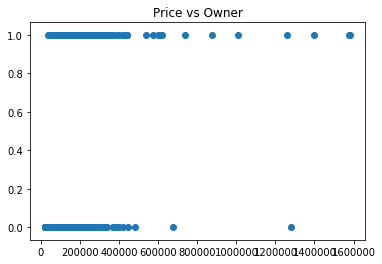

In [159]:
plt.scatter(df.price, df.Owner)
plt.title("Price vs Owner")

### 2. `Price` and `Pool`

Text(0.5,1,'Price vs Pool')

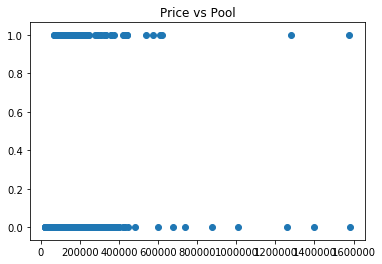

In [160]:
plt.scatter(df.price, df.Pool)
plt.title("Price vs Pool")

### 3. `Price` and `Fireplace` 

Text(0.5,1,'Price vs Fireplace')

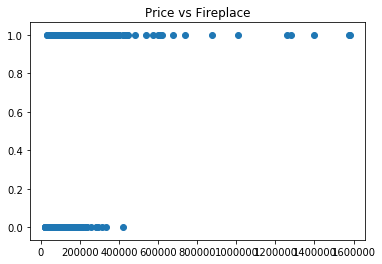

In [161]:
plt.scatter(df.price, df.Fireplace)
plt.title("Price vs Fireplace")

Based on all the three scatterplots above, it seems that there is no real relationship between `Price` and the variables removed. This visual check can verify our backward selection process to an extent.

## Testing for Heteroskedasticity

The next step would be to test for heteroskedasticity. Heteroskedasticity occurs when the variance for all observations in a data set are not the same. There are a two main important consequences of heteroskedasticity:
* The least squares estimator is linear and unbiased, but it is no longer the best.
* The standard errors computed for the least squares estimators are incorrect. This can affect confidence intervals and hypothesis testing that use those standard errors, which could lead to misleading conclusions.

### Residual Plot
The first method of detecting heteroskedasticity would be through residual plots.

Text(0.5,1,'Residuals vs Fitted Line')

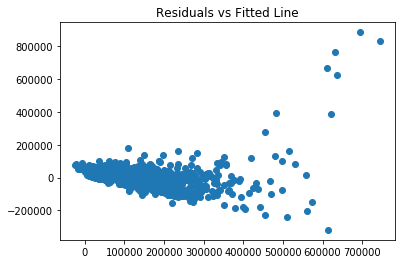

In [162]:
residuals = lm.resid
plt.scatter(lm.predict(), residuals)
plt.title('Residuals vs Fitted Line')

From the graph it seems like the residuals are increasing as the number of fitted values are increasing. This suggests heteroskedasticity. But a more scientific test will be needed to prove this.

### Breusch–Pagan Test
The Breusch-Pagan Test is a more formal way of testing for heteroskedasticity. A variance function gets defined and the null and alternate hypothesis are tested. If we accept this null hypothesis, then we consider our model to have homoskedasticity and if we reject the null hypothesis then we accept our model to have heteroskedasticity. Again, a siginificance level of 0.05 for the p-value is considered.

In [163]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
bp_test = sms.het_breuschpagan(residuals, lm.model.exog)
list(zip(name, bp_test))

[('Lagrange multiplier statistic', 218.11681280389115),
 ('p-value', 2.62293900602858e-44),
 ('f-value', 45.25735885005397),
 ('f p-value', 1.6355986670638636e-49)]

From the results table above, the p-value is:
`2.62293900602858e-44 << 0.05`
Because the p-value is less than the chosen significance level of 0.05, we reject the null hypothesis and conclude that our model `price ~ sqft + Bedrooms + Baths + Age + Traditional + Waterfront` has heteroskedasticity.

## Resolving Heteroskedasticity

The first problem of heteroskedasticity was that the least square estimator was no longer the best estimator despite being linear and unbiased. To deal with this problem, we could continue to use the least squares estimator but add in `Robust Standard Errors`.

The variance in the homoskedastic case is:

\begin{aligned}
var(b_2)=\frac{\sum_{i=1}^{N}\big[\sigma_i^2\big]}{\big[\sum_{i=1}^{N}(x_i-\bar{x})^2\big]}
\end{aligned}

And the Robust Standard Error can be shown by:
\begin{aligned}
\hat{var(b_2)}=\frac{N}{N-k} \frac{\sum_{i=1}^N\big[(x_i-\bar{x})^2\hat{e}_i^2\big]}{\big[\sum_{i=1}^N(x_i-\bar{x})^2\big]^2}
\end{aligned}

To see what the standard errors look like with the White Robust Error:

In [164]:
lm.HC0_se

Intercept      17720.941330
sqft              10.985143
Bedrooms        7090.484047
Baths           9941.538427
Age              143.192550
Traditional     4094.463150
Waterfront     17586.226746
dtype: float64

The following table below shows the comparison between the standard errors with the Robust Standard Errors and the Standard Errors from the Ordinary Least Squares:

In [165]:
lm.bse
se = np.vstack([[lm.bse], [lm.HC0_se]])
se = np.round(se,4)
colnames = ['Intercept', 'sqft', 'Bedrooms', 'Baths', 'Age', 'Traditional', 'Waterfront']
rownames = ['OLS', 'OLS_HC0']
tabl = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)
print(tabl)

        Intercept    sqft   Bedrooms   Baths     Age    Traditional Waterfront
------------------------------------------------------------------------------
OLS     12508.0349  3.7252 4546.4115 5597.9525 139.6283  4649.1919  9169.1147 
OLS_HC0 17720.9413 10.9851  7090.484 9941.5384 143.1926  4094.4631  17586.2267
------------------------------------------------------------------------------


We can see that the Robust Standard errors are indeed different from the OLS standard errors. The Robust Standard Errors are larger than the OLS Standard Errors possibly due to the fact that the variance of the error terms might be higher when the estimator is far from its mean.

### Generalized Least Squares With Unknown Form of Variance


When heteroskedasticity is present, the best linear unbiased estimator depends on the unknown $\sigma_i^2$. This estimator is referred to as the generalized least squares estimator. When the ordinary least squares estimator is no longer BLUE, this problem is solved by transforming the model into one with homoskedastic errors.

In [169]:
y, X = patsy.dmatrices('price ~ sqft + Bedrooms + Baths + Age + Traditional + Waterfront', data=df, return_type='dataframe')
residuals = lm.resid
var = smf.ols('residuals ~ sqft + Bedrooms + Baths + Age + Traditional + Waterfront', data=df).fit()
fitted_var = var.fittedvalues
fitted_var = fitted_var.values
w = 1/(abs(fitted_var))**(0.5)
gls = sm.GLS(y, X, w).fit()
print(gls.summary())

                            GLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.674
Model:                            GLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     369.2
Date:                Tue, 06 Mar 2018   Prob (F-statistic):          8.08e-257
Time:                        01:04:24   Log-Likelihood:                -13801.
No. Observations:                1080   AIC:                         2.762e+04
Df Residuals:                    1073   BIC:                         2.765e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.481e+04   1.42e+04     -2.458      

The GLS should be the one with the smallest variance but from the table above, it has a larger varaiance than the OLS. This could be because the weights that were manually specified are incorrect. From the scatter plot below, it is still evident that the heteroskedasticity has not been corrected. 

Text(0.5,1,'Residuals vs Fitted Line for GLS')

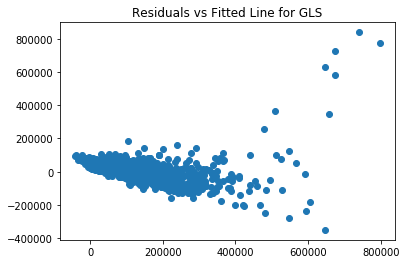

In [173]:
gls_residuals = gls.resid
plt.scatter(gls.predict(), gls_residuals)
plt.title('Residuals vs Fitted Line for GLS')

## Conclusion:

Heteroskedasticity occurs when the variance for all observations are not the same. To detect heteroskedasticity, one can plot the least squares residuals against the independent variables. A more formal way of identifying heteroskedasticity is by conducting a Breusch-Pagan test, where we estimate a variance function that depends on the independent variable(s), and test the null hypothesis that heteroskedasticity is not present against the alternative that heteroskedasticity is present. 

In this housing price example, the explanatory variables used are `sqft`, `Bedrooms`, `Baths`, `Age`, `Traditional` and `Waterfront`. Heteroskedasticity was detected and attempts were made to correct it. Unsuccessful attempts could be due to the incorrect weights used in the GLS. This is confirmed by the GLS scatterplot which still shows for heteroskedasticity.